In [89]:

import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [117]:

ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

# Hierarchical Clustering

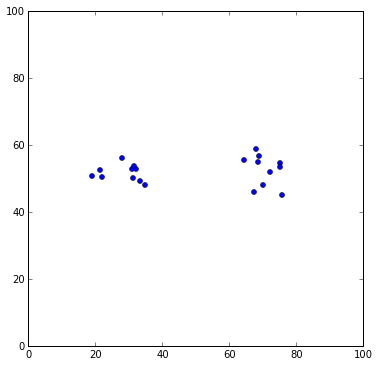

In [91]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

The idea behind linkage clustering, or hierarchical clustering, is to put things that are close together into the same cluster. Linkage clustering is usually based on distances only.



In [92]:
from scipy.spatial.distance import cdist
ds = cdist(data,data)

Based on pairwise distances, we can now compute a linkage matrix. We successively merge the closest points/clusters into the same cluster. The linkage "matrix" is simply a table listing which pairs of points are merged at what step and what distance.



In [95]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm[:5]

array([[  3.        ,   4.        ,   2.68570097,   2.        ],
       [ 14.        ,  17.        ,   3.14314292,   2.        ],
       [ 10.        ,  21.        ,   3.29251915,   3.        ],
       [ 18.        ,  19.        ,   4.09450922,   2.        ],
       [  5.        ,   6.        ,   4.97559363,   2.        ]])

Linkage information can be visualized as a dendrogram. Since we didn't shuffle the data, it's easy to see that the dendrogram reflects the structure of the original data.



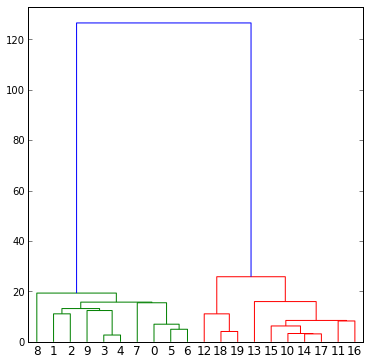

In [96]:
_=dendrogram(lm)

We can "cut" the dendrogram to form flat clusters. If we cut into two clusters, we get a good answer.



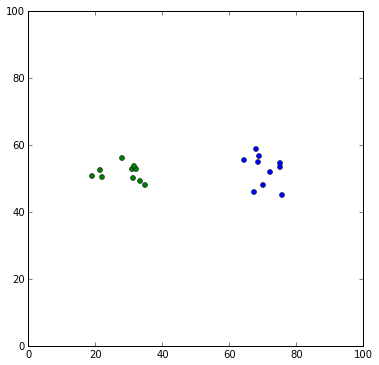

In [97]:
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

# Linkage Methods

In [115]:

data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- single linkage: cluster distance = smallest pairwise distance
- complete linkage: cluster distance = largest pairwise distance
- average linkage: cluster distance = average pairwise distance

## Single Linkage

Single Linkage:

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with unusual structure

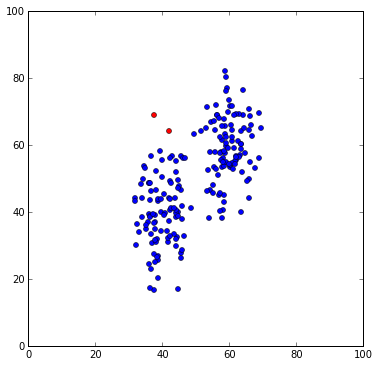

In [118]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

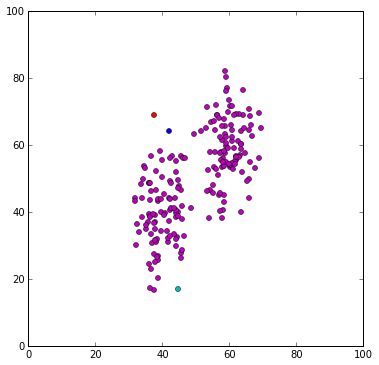

In [119]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

## Complete Linkage

Complete Linkage:

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

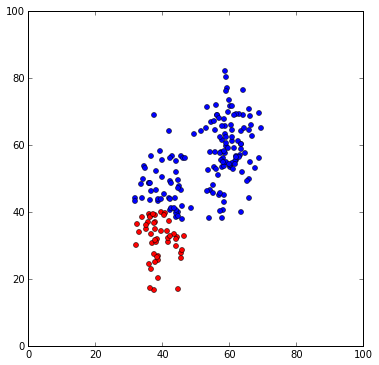

In [120]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

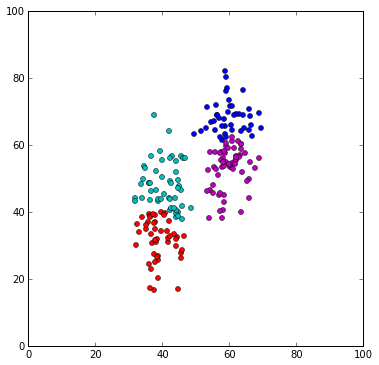

In [121]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

## Average Linkage

Average Linkage:

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

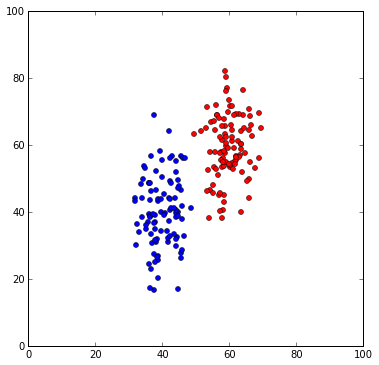

In [122]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

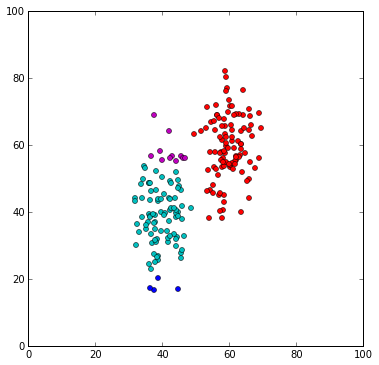

In [123]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

## Centroid Linkage

Average Linkage:

- cluster distance is the distance of the centroids of both clusters

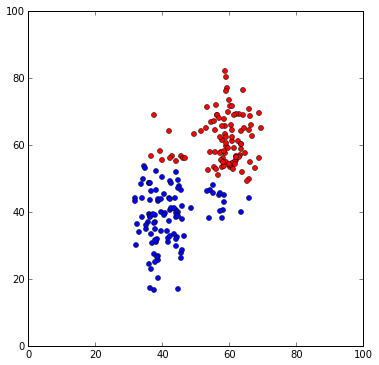

In [124]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

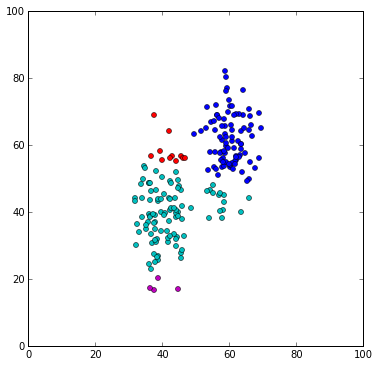

In [125]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

## Ward Linkage

Ward linkage:

- based on minimizing a variance criterion before and after merging

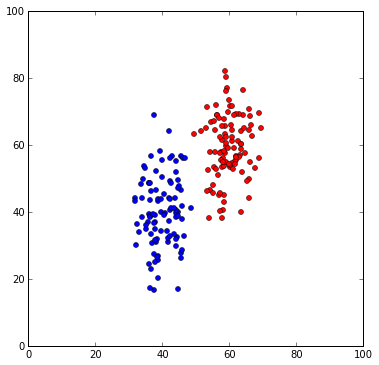

In [127]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

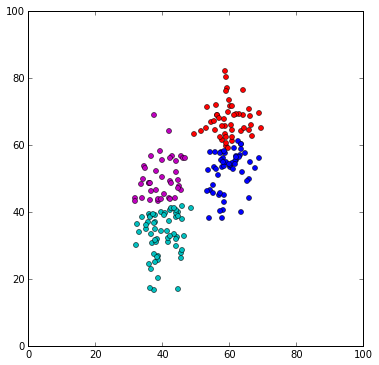

In [128]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

# Which Algorithm?

Which algorithm should you use?:

k-Means, Gaussian Mixtures:

- data consists of vectors in a vector space
- data is known to consist of prototypes plus error

hierarchical:

- only distances are known, or data does not live in a vector space
- some hierarchical structure (e.g., ontology) is known to underlie the data

Which linkage method?

- single and complete linkage have more efficient algorithms
- single linkage leads to "chaining", usually undesirable
- complete linkage finds compact clusters, approximately equal size
- average linkage is widely used in bioinformatics and fairly robust